### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [4]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X, X_test, y, y_test = train_test_split(X, y, stratify=y, test_size=0.05, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
tree = DecisionTreeClassifier(max_depth=3)
random_forest = RandomForestClassifier(max_depth=2)

In [9]:
tree.fit(X_train, y_train)
print(f'Acurácia de treino: {tree.score(X_train, y_train)}')
print(f'Acurácia de validacao: {tree.score(X_val, y_val)}')

Acurácia de treino: 0.7571428571428571
Acurácia de validacao: 0.776595744680851


In [10]:
random_forest.fit(X_train, y_train)
print(f'Acurácia de treino: {random_forest.score(X_train, y_train)}')
print(f'Acurácia de validacao: {random_forest.score(X_val, y_val)}')

Acurácia de treino: 0.7392857142857143
Acurácia de validacao: 0.7021276595744681


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

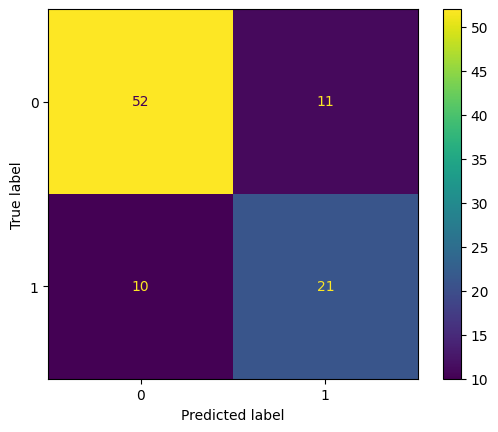

In [12]:
tree_predict = tree.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, tree_predict);

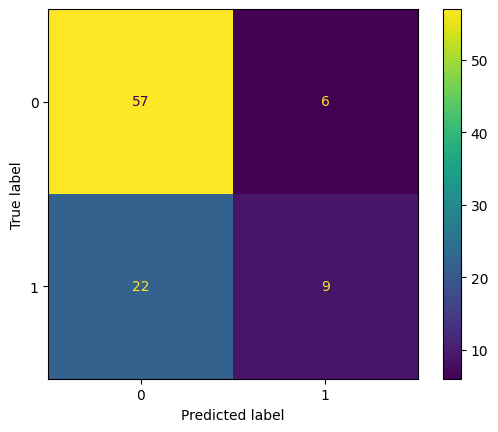

In [13]:
rf_predict = random_forest.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, rf_predict)

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [15]:
tree_predict = tree.predict(X_val)
print(f'Acurácia (Decision Tree): {accuracy_score(y_val, tree_predict)}')
print(f'Reccall (Decision Tree): {recall_score(y_val, tree_predict)}')
print(f'Precisão (Decision Tree): {precision_score(y_val, tree_predict)}')
print(f'F1_score (Decision Tree): {f1_score(y_val, tree_predict)}')

Acurácia (Decision Tree): 0.776595744680851
Reccall (Decision Tree): 0.6774193548387096
Precisão (Decision Tree): 0.65625
F1_score (Decision Tree): 0.6666666666666666


In [16]:
rf_predict = random_forest.predict(X_val)
print(f'Acurácia (Random Forest): {accuracy_score(y_val, rf_predict)}')
print(f'Reccall (Random Forest): {recall_score(y_val, rf_predict)}')
print(f'Precisão (Random Forest): {precision_score(y_val, rf_predict)}')
print(f'F1_score (Random Forest): {f1_score(y_val, rf_predict)}')

Acurácia (Random Forest): 0.7021276595744681
Reccall (Random Forest): 0.2903225806451613
Precisão (Random Forest): 0.6
F1_score (Random Forest): 0.391304347826087


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [17]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

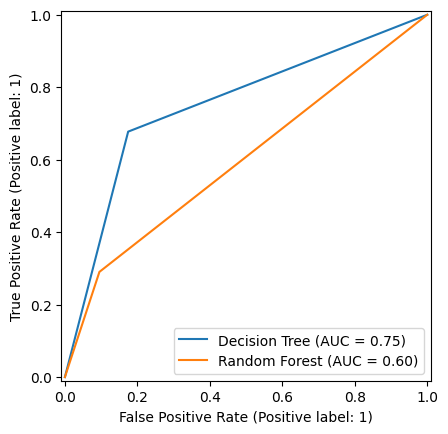

In [18]:
cruva_ROC = RocCurveDisplay.from_predictions(y_val, tree_predict, name='Decision Tree')
cruva_ROC = RocCurveDisplay.from_predictions(y_val, rf_predict, name='Random Forest', ax=cruva_ROC.ax_)

In [19]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, tree_predict)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, rf_predict)}')

AUC (Decision Tree): 0.7514080901177674
AUC (Random Forest): 0.5975422427035331


### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [20]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

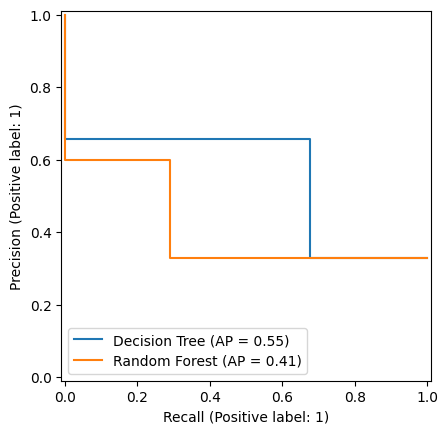

In [21]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, tree_predict, name='Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, rf_predict, name='Random Forest', ax=curva_precision_recall.ax_)

In [22]:
print(f'AP (Decision Tree): {average_precision_score(y_val, tree_predict)}')
print(f'AP (Random Forest): {average_precision_score(y_val, rf_predict)}')

AP (Decision Tree): 0.5509394303363074
AP (Random Forest): 0.40823610157858614


### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [23]:
from sklearn.metrics import classification_report

In [24]:
print('Decision Tree')
print(classification_report(y_val, tree_predict))
print('Random Forest')
print(classification_report(y_val, rf_predict))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

Random Forest
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        63
           1       0.60      0.29      0.39        31

    accuracy                           0.70        94
   macro avg       0.66      0.60      0.60        94
weighted avg       0.68      0.70      0.67        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [25]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confianca ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [26]:
from sklearn.model_selection import cross_val_score, KFold

In [27]:
tree = DecisionTreeClassifier(max_depth=3)
random_forest = RandomForestClassifier(max_depth=2)

kf = KFold(n_splits=10, shuffle=True, random_state=5)

resultado_tree = cross_val_score(tree, X, y, cv=kf)
resultado_rf = cross_val_score(random_forest, X, y, cv=kf)

intervalo_conf(resultado_tree, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianca (Decision Tree): [0.5337181765177326, 0.8684155361422958]
Intervalo de confianca (Random Forest): [0.5805030922905804, 0.8250445606254936]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [29]:
tree = DecisionTreeClassifier(max_depth=3)
random_forest = RandomForestClassifier(max_depth=2)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

resultado_tree = cross_val_score(tree, X, y, cv=skf, scoring='f1')
resultado_rf = cross_val_score(random_forest, X, y, cv=skf, scoring='f1')

intervalo_conf(resultado_tree, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianca (Decision Tree): [0.271659875902482, 0.7462406274736961]
Intervalo de confianca (Random Forest): [0.1459008699042171, 0.5686924315311895]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [30]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [67]:
tree = DecisionTreeClassifier(max_depth=3)
random_forest = RandomForestClassifier(max_depth=2)

loo = LeaveOneOut()

resultado_tree = cross_val_score(tree, X, y, cv=loo)
resultado_rf = cross_val_score(random_forest, X, y,cv=loo)

print(f'Acurácia média (Decision Tree): {resultado_tree.mean()}')
print(f'Acurácia média (Random Forest): {resultado_rf.mean()}')

Acurácia média (Decision Tree): 0.7085561497326203
Acurácia média (Random Forest): 0.6844919786096256


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [31]:
df['diabetes'].value_counts(normalize=True)

diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64

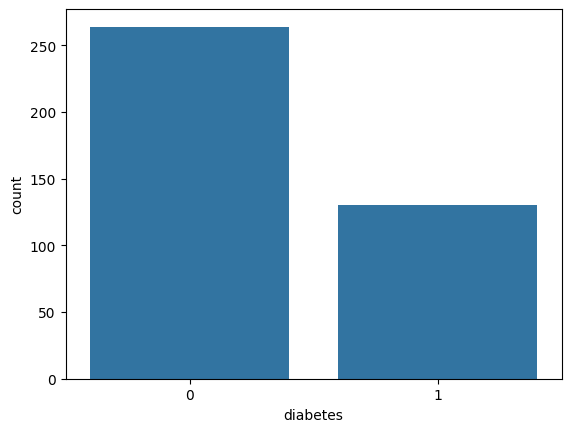

In [34]:
import seaborn as sns

sns.countplot(df, x = 'diabetes');

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [35]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [37]:
tree = DecisionTreeClassifier(max_depth=3)
pipeline = imbpipeline([('oversample', SMOTE()), ('Tree', tree)])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_tree = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')
print(f'F1 (Decision Tree):{resultado_tree.mean()}')

F1 (Decision Tree):0.5804900858582485


In [40]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6224017609817405


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [42]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

In [54]:
tree = DecisionTreeClassifier(max_depth=3)
pipeline = imbpipeline([('unedersample', NearMiss(version=3)), ('Tree', tree)])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_tree = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')
print(f'F1 (Decision Tree): {resultado_tree.mean()}')

F1 (Decision Tree): 0.5460263484053807


In [55]:
random_forest = RandomForestClassifier(max_depth=2)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('Random Forest', random_forest)])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_rf = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')
print(f'F1 (Random Forest): {resultado_rf.mean()}')

F1 (Random Forest): 0.6145567793648995


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



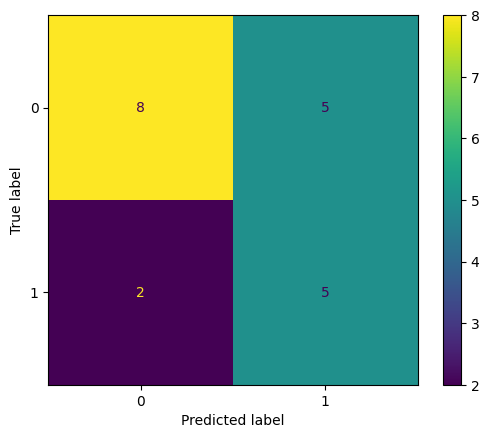

In [56]:
undersample = NearMiss(version = 3)
X_balanceado, y_balanceado = undersample.fit_resample(X, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(X_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);